# Exercise 1

## Eercise 1 - Makeover

In [10]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df = duckdb.query(
    """
    SELECT avg_CO2, year, month
    FROM df

"""
).df()

df

,Avg_CO2,Year,Month
0,152,2007,1
1,156,2007,2
2,159,2007,3
3,160,2007,4
4,160,2007,5
...,...,...,...
116,88,2016,9
117,91,2016,10
118,88,2016,11
119,98,2016,12


TypeError: save_fig_from_ax() takes 1 positional argument but 2 were given

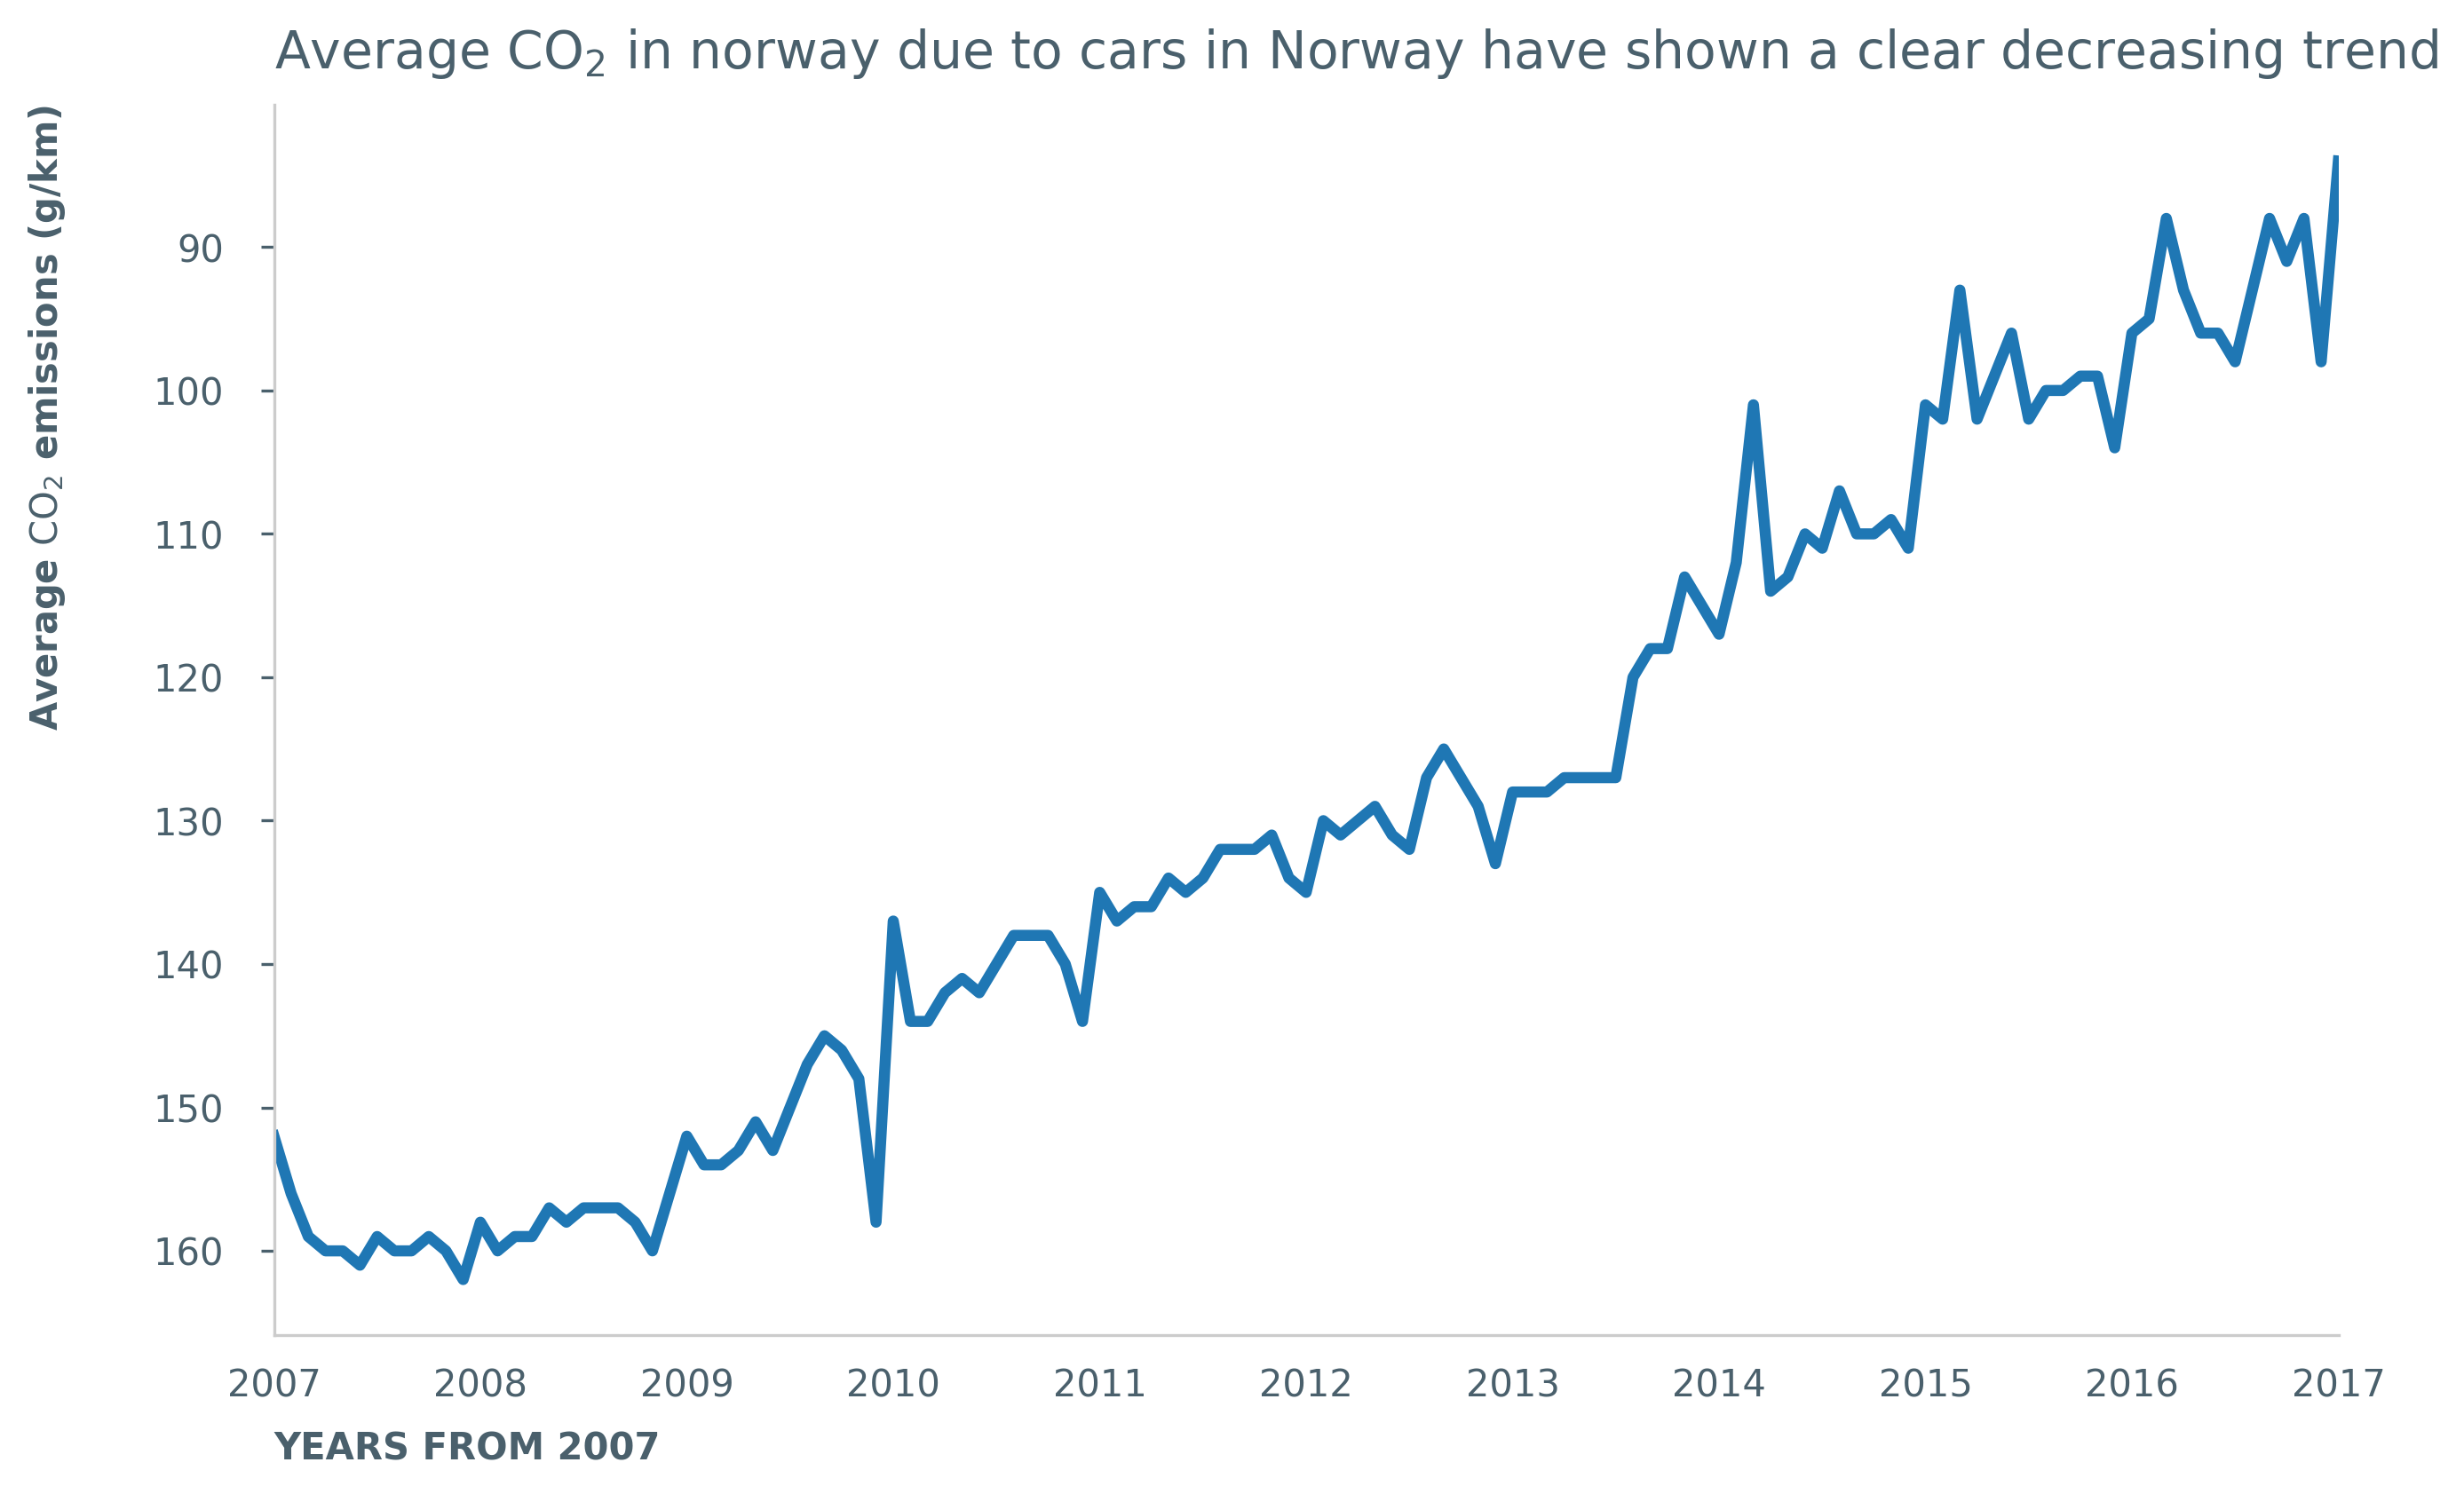

In [11]:
import matplotlib.pyplot as plt
from charts_utils import label_options, save_fig_from_ax

plt.style.use("styles/base.mplstyle")

df["date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

df = df.set_index("date")

ax = df["Avg_CO2"].plot()

ax = label_options(
    ax,
    title="Average CO$_2$ in norway due to cars in Norway have shown a clear decreasing trend",
    xlabel="YEARS FROM 2007",
)

ax.set_ylabel(r"Average $\mathrm{CO_2}$ emissions (g/km)", loc="top", rotation=90)
fig = save_fig_from_ax(ax, "figures/CO2_cars_norway.png")

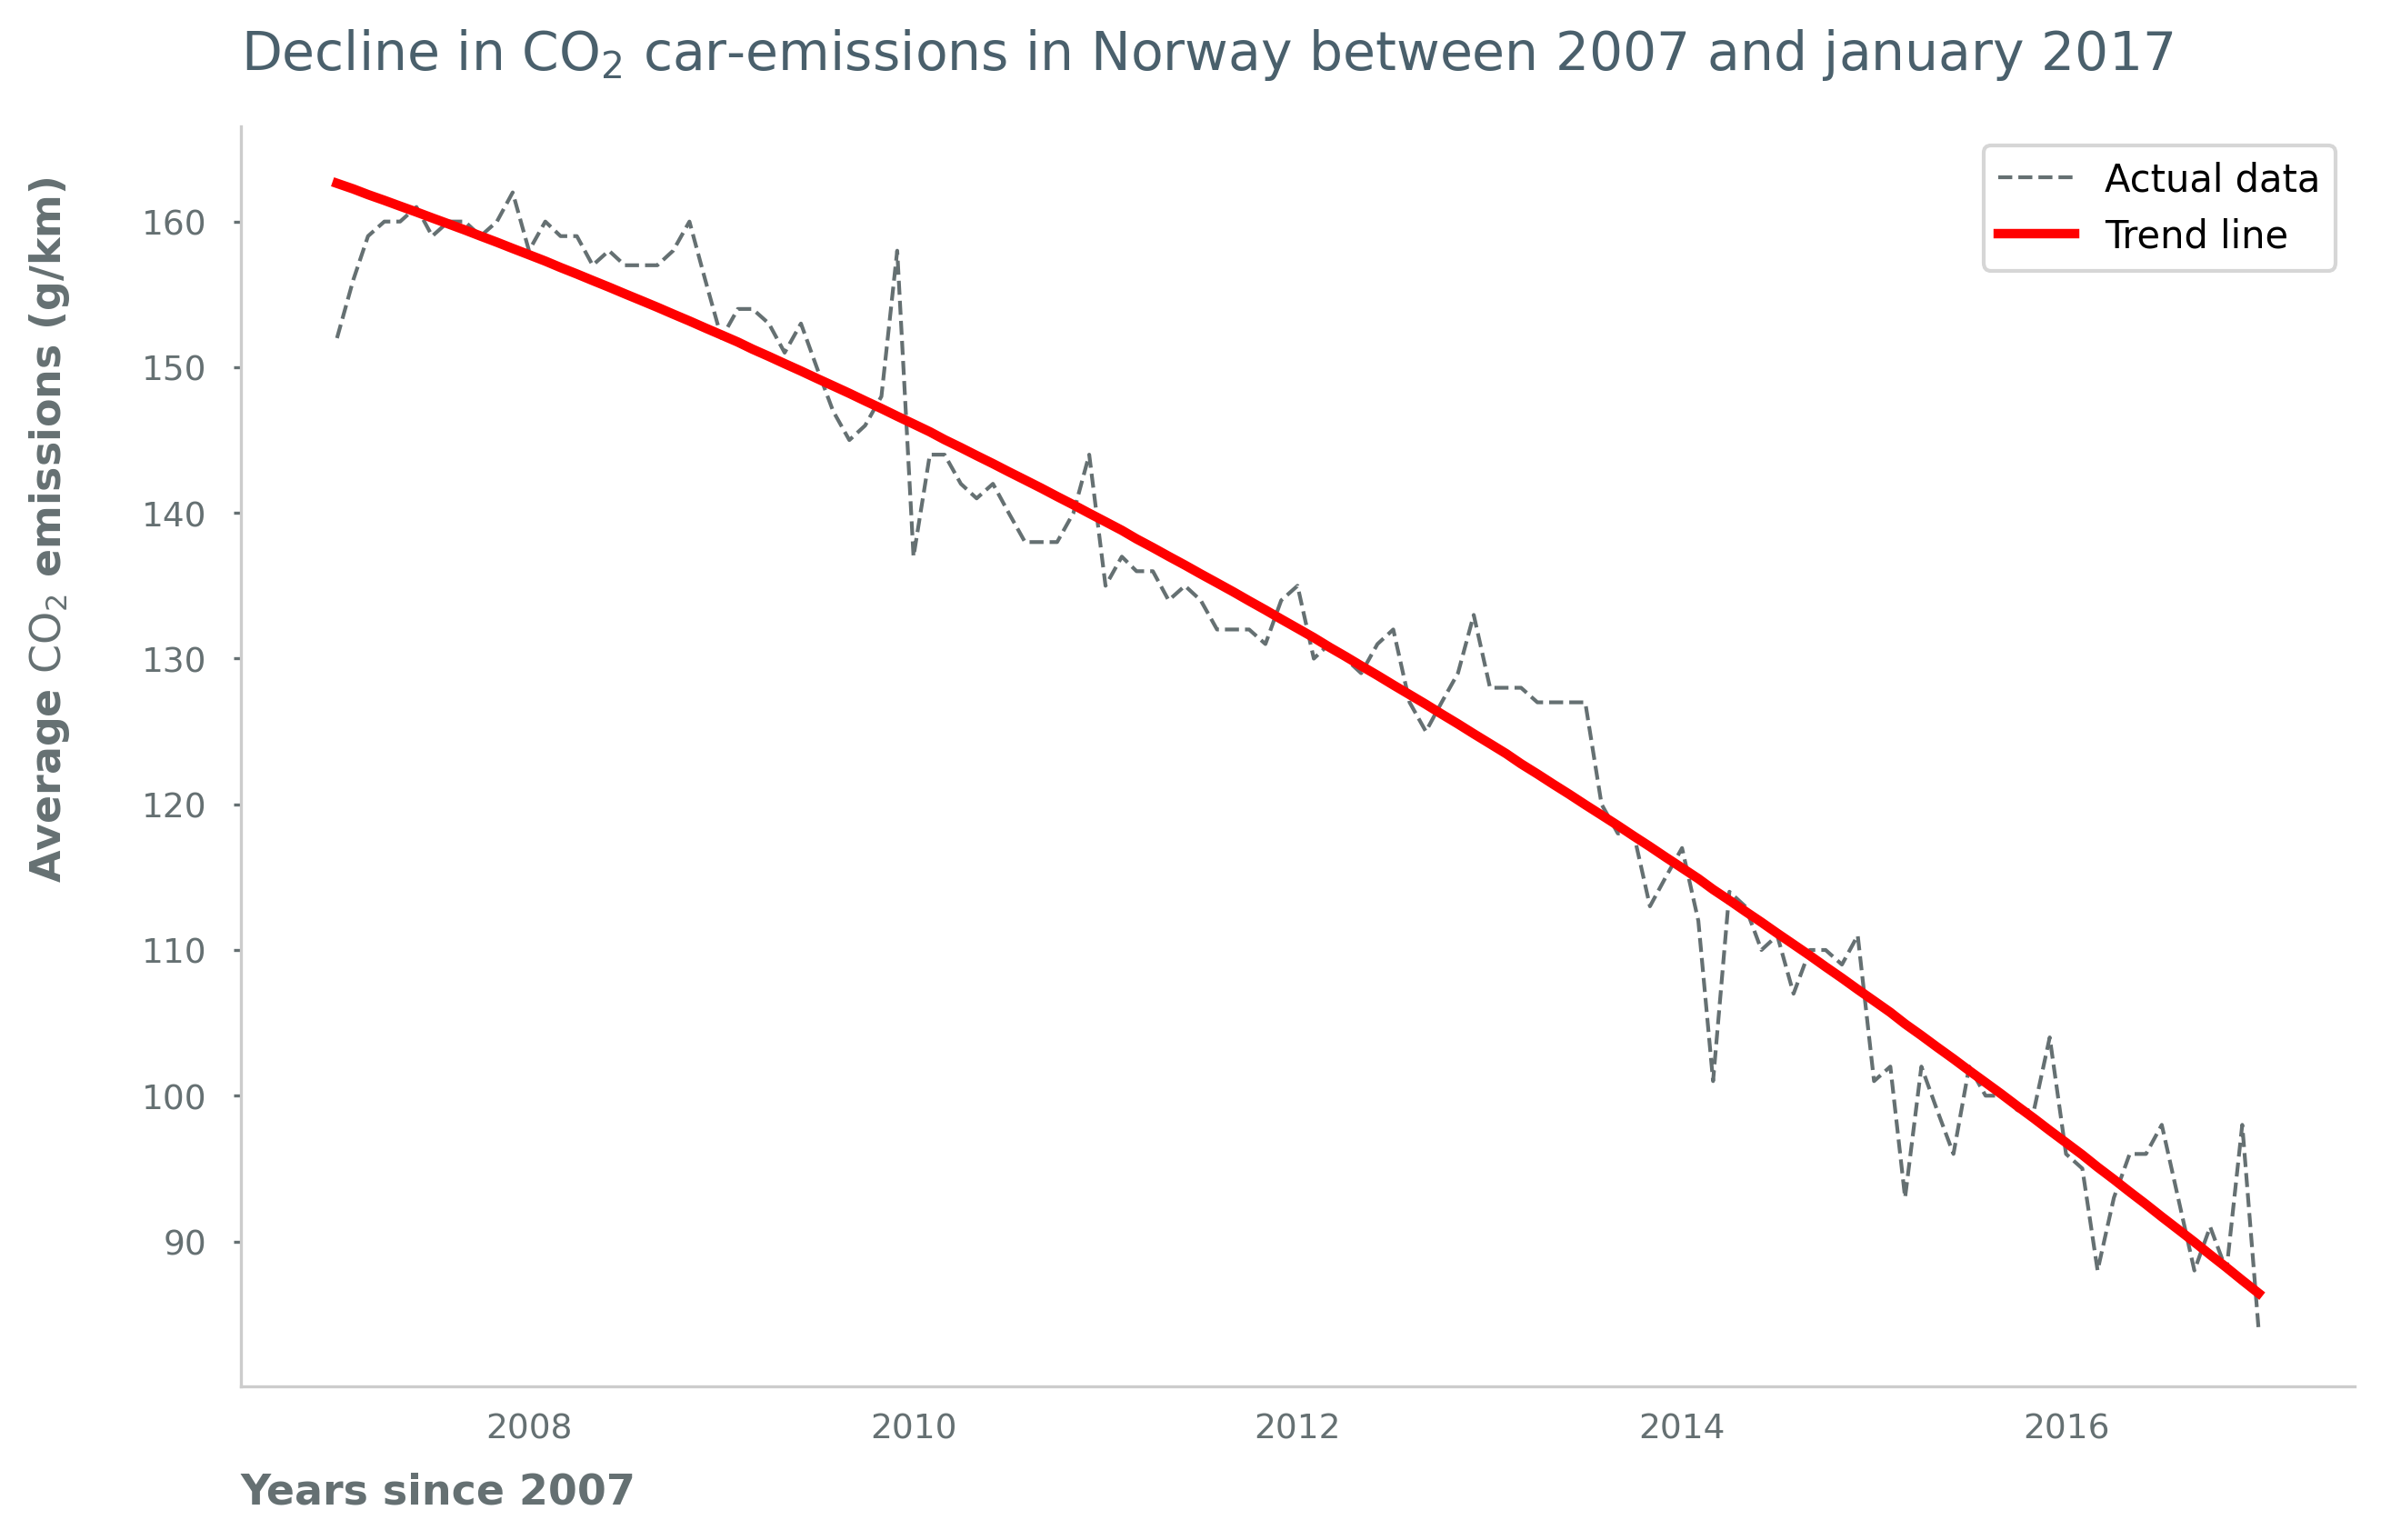

In [12]:
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

import numpy as np
import matplotlib.pyplot as plt

# Index represents years or a time series
x = np.arange(len(df))
y = df["Avg_CO2"].values

# Fit a linear trend line
coeffs = np.polyfit(x, y, deg=2)
trend = np.polyval(coeffs, x)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data
ax.plot(df.index, y, label="Actual data", color=GRAY_2, linestyle="--", linewidth=1)

# Plot the trend line
ax.plot(df.index, trend, label="Trend line", color="red", linewidth=2.5)

# remove clutter: top spine and right spine.
ax.spines[["top", "right"]].set_visible(False)

#  left align the title
ax.set_title(
    r"Decline in $\mathrm{CO_2}$ car-emissions in Norway between 2007 and january 2017",
    loc="left",
    fontsize=14,
    color=GRAY_3,
    pad=15,
)

# Left align the xlabel
ax.set_xlabel("Years since 2007", color=GRAY_2, fontsize=11, loc="left")

# top align the ylabel
ax.set_ylabel(
    r"Average $\mathrm{CO_2}$ emissions (g/km)", color=GRAY_2, fontsize=11, rotation=90
)
ax.yaxis.set_label_coords(-0.08, 0.68)

# contrast
ax.spines[["bottom", "left"]].set_color(GRAY_1)

ax.tick_params(axis="both", colors=GRAY_2, labelsize=9, length=2, pad=5)
ax.tick_params(axis="y", pad=7)

# remove minor ticks
ax.minorticks_off()

ax.legend()